<center>
<p>
<center>
Universidade Federal de Minas Gerais <br/>
Introdução à Programação de Computadores <br/>
2024/2
</center>
</p>
<h1><b>Aula Prática 10</b></h1>
<b>Total: 2 pontos</b>
</center>

<br/>
<p>
<h4><b>Professores:</b></h4>
<ul>
    <li>Adriano César Machado Pereira</li>
    <li>Gilberto Medeiros Ribeiro</li>    
    <li>João Guilherme Maia de Menezes</li>
</ul>

In [5]:
print("teste")

teste


In [6]:
#@markdown ####**Aluno** {run: "auto"}
Nome = "" #@param {type:"string"}
Matrícula = "" #@param {type:"string"}

# Estatísticas sobre Gastos Parlamentares
------------------

# 1. Introdução

---------------

A Cota para o Exercício da Atividade Parlamentar – CEAP (antiga verba indenizatória) é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar.

Nessa atividade prática você deverá implementar uma série de funções para geração de gráficos sobre os gastos parlamentares utilizando os dados publicamente disponíveis sobre as despesas do [CEAP](https://dadosabertos.camara.leg.br/swagger/api.html "Arquivos - Despesas pela Cota para Exercício da Atividade Parlamentar").




# Tarefa 0 - Leitura dos dados
---------------

**Essa está pronta! :-)**

Nas duas células abaixo baixamos os arquivos CSVs de 2009 até 2020 e implementamos uma função para leitura dos dados contidos no arquivo CSV de um ano específico. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas. Perceba que a lista com os registros dos dados é uma lista multidimensional. Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também imprimimos o índice de cada coluna nos registros para facilitar o acesso.

**OBS: Execute as duas células abaixo**

In [7]:
import os, zipfile, urllib.request

dir_name = 'dados_parlamentares'

urls = ('http://www.camara.leg.br/cotas/Ano-2020.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2019.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2018.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2017.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2016.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2015.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2014.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2013.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2012.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2011.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2010.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2009.csv.zip')

if not os.path.exists(dir_name):
    os.mkdir(dir_name)

for url in urls:
    file_name = url.split('/')[-1]
    with urllib.request.urlopen(url) as dl_file:
        with open(file_name, 'wb') as out_file:
            out_file.write(dl_file.read())
    with zipfile.ZipFile(file_name) as zip_ref:
        zip_ref.extractall(dir_name)
    if os.path.exists(file_name):
        os.remove(file_name)

In [17]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo.
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica.
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    #with open(filename, 'r', encoding='ISO-8859-1') as file:
    with open(filename, 'r', encoding='UTF-8') as file:
        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes:
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            #dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
            dados.append(line.rstrip().replace('","','";"').split('";"'))
            dados[-1][0]=dados[-1][0].replace('"','')
            dados[-1][-1]=dados[-1][-1].replace('"','')


    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)

    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
# Apenas um teste. Fique a vontade para alterar ou apagar esse trecho de código.

rotulos, dados = le_dados("dados_parlamentares/Ano-2019.csv")

# Para entender o formato dos dados
print(rotulos, "\n")
print("Registro na primeira posição:\n", dados[0])
print()
print("Nome do parlamentar: ", dados[0][0])
print("Número total de registros: %d\n" % (len(dados)))

# Para identificar o índice de cada coluna nos registros
print('Índice - Rótulo')
for i, rotulo in enumerate(rotulos):
    print(f'{i} - {rotulo}')

['\ufefftxNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota', 'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote', 'numRessarcimento', 'datPagamentoRestituicao', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'] 

Registro na primeira posição:
 ['LID.GOV-CD', '', '', '', '2015', 'NA', '', '55', '13', 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR', '0', '', 'CRISTIANE FERREIRA EPP', '037.139.030/0010-8', '693', '4', '2019-01-16T00:00:00', '111.3', '0', '111.3', '1', '2019', '0', '', '', '1554246', '', '', '', '2812', '6738121', 'https://www.camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6738121']

Nome do parlamentar:  LID.GOV-CD
Número total de registros:

Tarefa 1 - Como é a evolução dos gastos ao longo dos anos?
---------

**Agora é com você!**

Implemente funções para gerar um gráfico que mostra a evolução dos gastos das cotas da Câmara dos Deputados entre **2009 e 2020**.

**Dica:** a informação do gasto está na coluna identificada com o rótulo 'vlrLiquido'.

In [ ]:
# Escreva o seu código nesta célula
import csv

def count_value(file_path):
    sum = 0.0
    with open(file_path, 'r', encoding='UTF-8') as data:
        reader = csv.DictReader(data, delimiter=';')

        for row in reader:
            value = row['vlrLiquido']
            if value:
                sum += float(value)

    return sum
    

dir_path = "dados_parlamentares"
files = os.listdir(dir_path)
values = []

for file in files:
    file_path = dir_path + "/" + file
    value = count_value(file_path)
    values.append((file_path.split("/")[-1].split("-")[1].split(".")[0], value))

print(values)

#print(dados[0])



[('2009', 115404993.06001836), ('2010', 154391857.68004504), ('2011', 171967272.0699704), ('2012', 170472875.8499203), ('2013', 189465573.18992415), ('2014', 196439714.41996962), ('2015', 214081154.24999124), ('2016', 221061558.1999929), ('2017', 225876402.67006755), ('2018', 215427530.79005247), ('2019', 211367654.52988), ('2020', 173704183.51000357)]


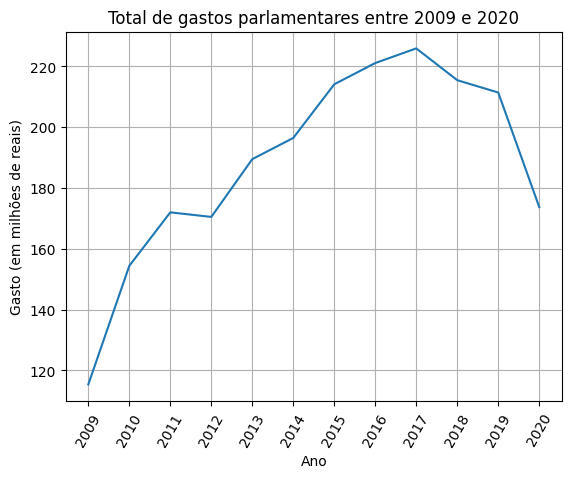

In [5]:
## Não execute esta célula para não perder o gabarito




Tarefa 2 - Quais os deputados que mais gastaram?
---------

Implemente funções para gerar um gráfico de barras que mostra os **20 parlamentares** que mais gastaram em **2020**.

In [ ]:
# Escreva o seu código nesta célula




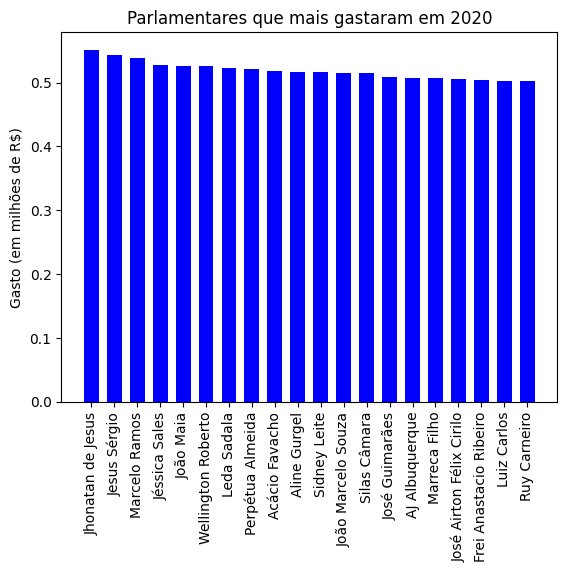

In [6]:
## Não execute esta célula para não perder o gabarito




Tarefa 3 - Quais os partidos que mais gastam na média?
---------

Implemente funções para gerar um gráfico de barras que mostra o ***gasto médio*** de cada partido no ano de **2020**. Você deve exibir os dados de maneira decrescente, ou seja, do partido com o maior gasto médio para o menor.

***Dica***: o gasto médio do partido X é a soma dos gastos de todos os deputados filiados ao partido X dividido pela quantidade de deputados filiados ao partido X. Cuidado com deputados que mudam de partido ao longo do ano. O rótulo 'partido' está em branco em alguns registros (verificar se é diferente da string vazia '').

In [ ]:
# Escreva o seu código nesta célula




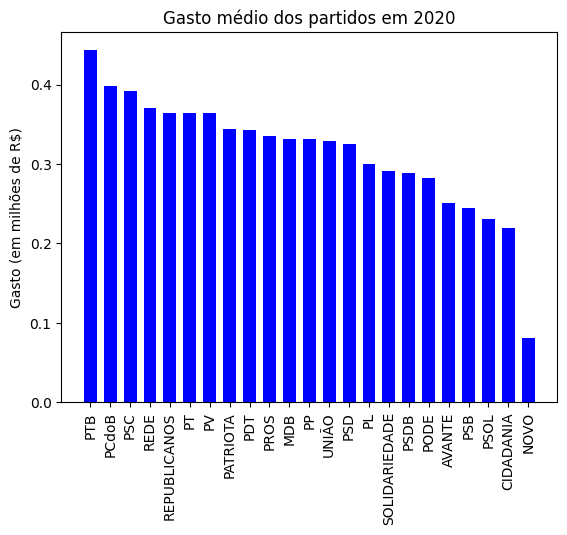

In [7]:
## Não execute esta célula para não perder o gabarito




Tarefa 4 - Quais os estados com os maiores gastos na média?
---------

Implemente funções para gerar um gráfico de barras que mostra o ***gasto médio*** de cada estado no ano de **2020**. Você deve exibir os dados de maneira decrescente, ou seja, do estado com o maior gasto médio para o menor.

***Dica***: o gasto médio do estado X é a soma dos gastos de todos os deputados do estado X dividido pela quantidade de deputados do estado X. O rótulo 'sgUF' está em branco em alguns registros (verificar se é diferente da string vazia '' e diferente de 'NA').

In [ ]:
# Escreva o seu código nesta célula




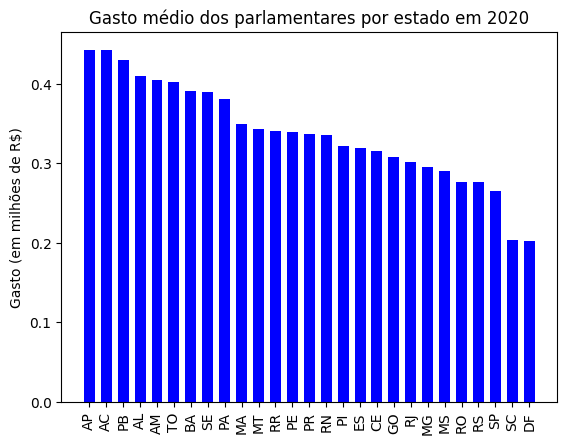

In [8]:
## Não execute esta célula para não perder o gabarito


